<a href="https://colab.research.google.com/github/BurakCifci/Machine-Learning-CPE312/blob/main/Machine_Learning_CPE312_WEEK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("/content/data.csv") #İyi ve kötü huylu kanser hücreleri hakkında dataset // #M kotu huylu tumor B iyi huylu tumor
data.drop(["Unnamed: 32","id"],axis=1,inplace=True) #Verideki Unnamed: 32 ve id isimli kısımları kaldırdık
data.diagnosis = [1 if each =="M" else 0 for each in data.diagnosis]
print(data.info())

y=data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1) #data.diagnosis harici butun veriler x ekseninde olacak.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) #%20lik kismi test icin ayirdik

#transpozlarını aldik
x_train = x_train.T 
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train:",x_train.shape)
print("x_test,:",x_test.shape)
print("y_train",y_train.shape)
print("y_test:",y_test.shape)

x_train: (30, 455)
x_test,: (30, 114)
y_train (455,)
y_test: (114,)


In [6]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01) #0.01'lerden olusan bir matris olusturur. #En basta rastgele sectigimiz weight degerlerini buradan alıyoruz.
    b = 0.0
    return w,b
    
#w,b = initialize_weights_and_bias(30)

def sigmoid(z):
    
    y_head =1/(1 + np.exp(-z)) #sigmoid f. formulu
    return y_head

In [14]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost) #tüm costlarin degerini tutuyoruz
        
        #weight - learningrate * weigthin cost'a gore turevi
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0: #her 10 adimda bir costlarin degerini tutar
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
            
            
    parameters = {"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,cost_list2)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    #cost ile gradient degerleri birbiri ile bağlantili degerlerdir birisi azalirsa digeri de azalir
    return parameters,gradients,cost_list2

In [15]:
def forward_backward_propagation(w,b,x_train,train):
    #forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    #backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

    # 1 forward propagation + 1 backward propagation = 1 number_of_iteration
    # En basta rastgele 0.01 olarak aldıgımız weight degerlerini en verimli hale getirmek icin forward ve backward pro. uyguluyoruz.

In [16]:
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260: 0.158155
Cost after iteration 270: 0.156091
Cost after iteration 280: 0.154

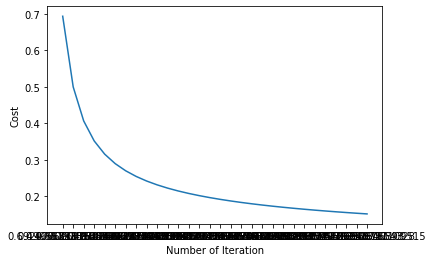

test accuracy: 96.49122807017544 %


In [17]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate , num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print train/test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9824561403508771
